stm_process.ipynb

Author: Anderson Steckler

Process Dutreix plot to see if our analysis matches theirs

In [87]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [88]:
img = Image.open('fig1a.png').convert('L') # Grayscale
img = np.array(img)

np.shape(img)

(385, 385)

Text(0.5, 1.0, 'Dutreix Fig1a')

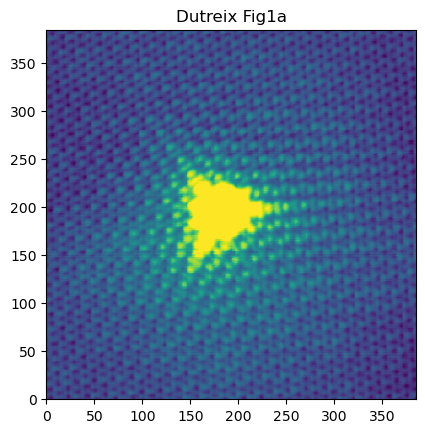

In [89]:
fig, ax = plt.subplots()

ax.pcolormesh(img)
ax.set_aspect('equal')
ax.set_title('Dutreix Fig1a')

In [90]:
# FFT2D
ftz = np.fft.fft2(img)
ftz = np.fft.fftshift(ftz)

In [91]:
np.shape(ftz)

(385, 385)

In [92]:
xlin = np.linspace(-10, 10, 385)
ylin = np.linspace(-10, 10, 385)

In [93]:
# Periodic 1D Hann Function
def hann1dp(x, N, x0):
    return np.cos(np.pi * (x-x0)/N) ** 2

def hann2d(x, y, Nx, Ny, x0, y0): 
    val = hann1dp(x, Nx, x0) * hann1dp(y, Ny, y0)

    return np.where((np.abs(x-x0) <= 0.5 * Nx) & (np.abs(y-y0) <= 0.5 * Ny), val, 0)

hann_vec = np.vectorize(hann2d)

In [94]:
%matplotlib inline

(-3.0, 3.0)

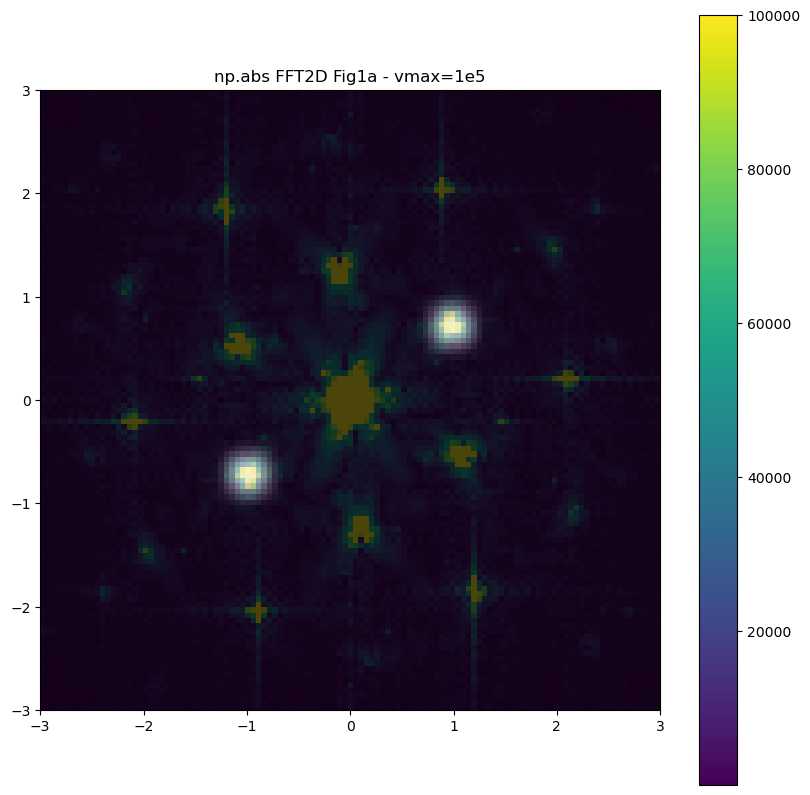

In [107]:
fig1, ax1 = plt.subplots(figsize=(10, 10))

pc = ax1.pcolormesh(xlin, ylin, (np.abs(ftz)), vmax=1e5)
fig1.colorbar(pc, ax=ax1)

# Hann Filter
x0, y0, w = 0.987, 0.716, 0.7
xx, yy = np.meshgrid(xlin, ylin)
ax1.pcolormesh(xx, yy, hann2d(xx, yy, w, w, x0, y0) + hann2d(xx, yy, w, w, -x0, -y0), alpha=0.7, cmap='grey')

ax1.set_aspect('equal')
ax1.set_title('np.abs FFT2D Fig1a - vmax=1e5')
ax1.set_xlim(-3, 3)

ax1.set_ylim(-3, 3)

(-3.0, 3.0)

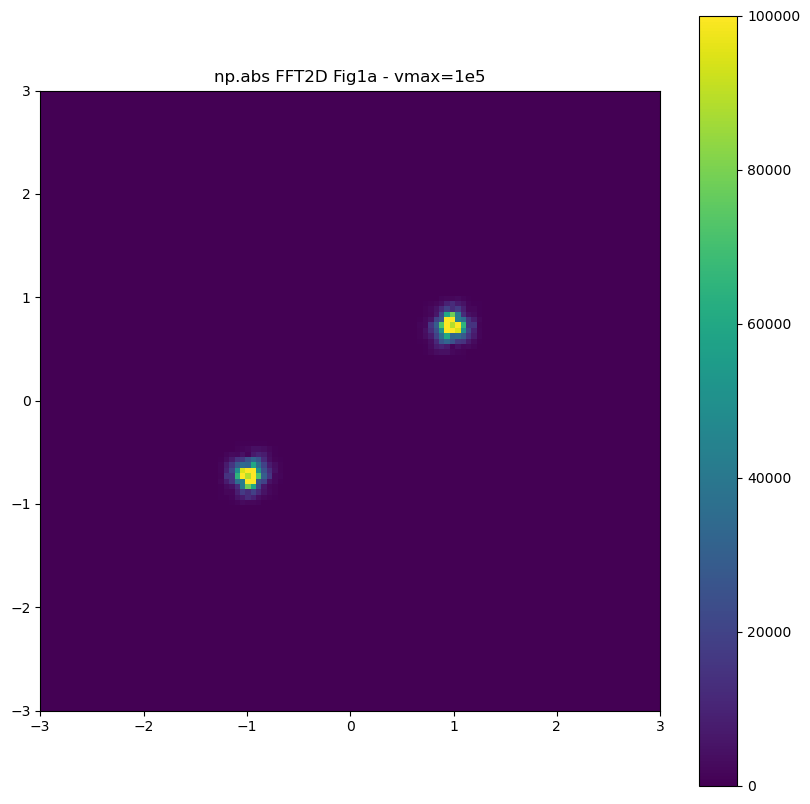

In [108]:
fig2, ax2 = plt.subplots(figsize=(10, 10))

hz = hann2d(xx, yy, w, w, x0, y0) + hann2d(xx, yy, w, w, -x0, -y0)

zfilt = np.abs(ftz) * hz

pc = ax2.pcolormesh(xlin, ylin, zfilt, vmax=1e5)
fig1.colorbar(pc, ax=ax2)

ax2.set_aspect('equal')
ax2.set_title('np.abs FFT2D Fig1a - vmax=1e5')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)

Text(0.5, 1.0, 'np.real Filtered')

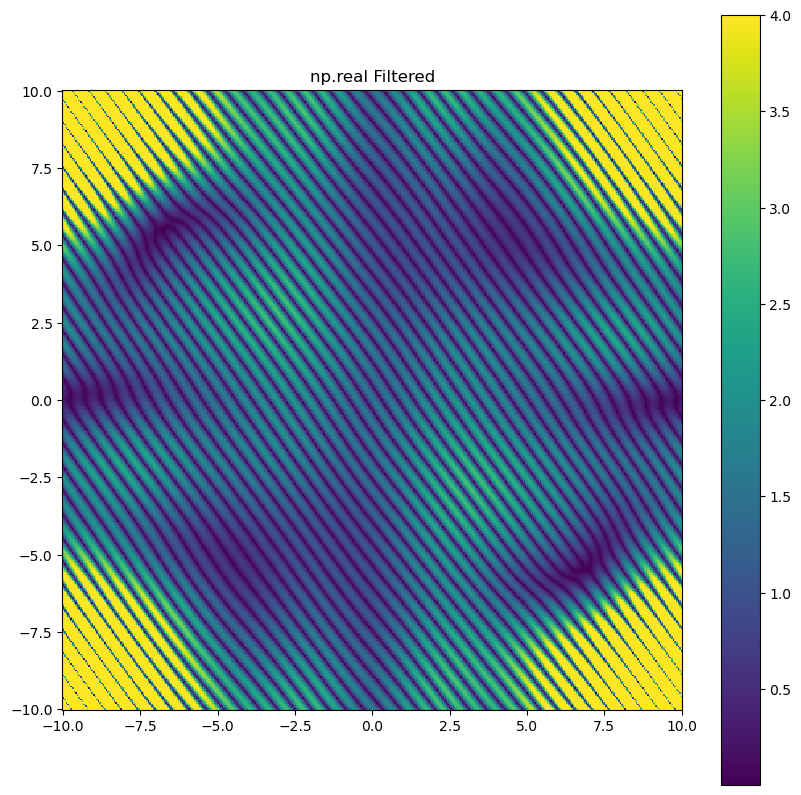

In [112]:
z_post = np.fft.ifft2(zfilt)

fig3, ax3 = plt.subplots(figsize=(10, 10))

pc = ax3.pcolormesh(xlin, ylin, np.abs(z_post), vmax=4)
fig1.colorbar(pc, ax=ax3)

ax3.set_aspect('equal')
ax3.set_title('np.real Filtered')
